In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
nifty=pd.read_csv("D:\ml projects\^NSEI.csv")

In [3]:
nifty["prev_day_high"]=nifty.High.shift(+1)
nifty["prev_day_low"]=nifty.Low.shift(+1)
nifty["prev_day_close"]=nifty.Close.shift(+1)
nifty=nifty.drop(["Close", "Adj Close","Volume"],axis=1)
nifty.dropna(inpla  ce=True)
nifty








,Date,Open,High,Low,prev_day_high,prev_day_low,prev_day_close
1,2010-11-04,6209.600098,6290.149902,6199.350098,6182.500000,6146.799805,6160.500000
2,2010-11-08,6335.250000,6335.899902,6265.350098,6290.149902,6199.350098,6281.799805
3,2010-11-09,6281.000000,6310.899902,6243.549805,6335.899902,6265.350098,6273.200195
4,2010-11-10,6303.200195,6307.649902,6269.250000,6310.899902,6243.549805,6301.549805
5,2010-11-11,6286.350098,6296.549805,6179.500000,6307.649902,6269.250000,6275.700195
...,...,...,...,...,...,...,...
3207,2023-10-27,18928.750000,19076.150391,18926.650391,19041.699219,18837.849609,18857.250000
3208,2023-10-30,19053.400391,19158.500000,18940.000000,19076.150391,18926.650391,19047.250000
3209,2023-10-31,19232.949219,19233.699219,19056.449219,19158.500000,18940.000000,19140.900391
3210,2023-11-01,19064.050781,19096.050781,18973.699219,19233.699219,19056.449219,19079.599609


In [4]:
nifty.reset_index(drop=True, inplace=True)
nifty

,Date,Open,High,Low,prev_day_high,prev_day_low,prev_day_close
0,2010-11-04,6209.600098,6290.149902,6199.350098,6182.500000,6146.799805,6160.500000
1,2010-11-08,6335.250000,6335.899902,6265.350098,6290.149902,6199.350098,6281.799805
2,2010-11-09,6281.000000,6310.899902,6243.549805,6335.899902,6265.350098,6273.200195
3,2010-11-10,6303.200195,6307.649902,6269.250000,6310.899902,6243.549805,6301.549805
4,2010-11-11,6286.350098,6296.549805,6179.500000,6307.649902,6269.250000,6275.700195
...,...,...,...,...,...,...,...
3154,2023-10-27,18928.750000,19076.150391,18926.650391,19041.699219,18837.849609,18857.250000
3155,2023-10-30,19053.400391,19158.500000,18940.000000,19076.150391,18926.650391,19047.250000
3156,2023-10-31,19232.949219,19233.699219,19056.449219,19158.500000,18940.000000,19140.900391
3157,2023-11-01,19064.050781,19096.050781,18973.699219,19233.699219,19056.449219,19079.599609


In [5]:
# converting the date column from string to actual date and time

modifiednifty=pd.read_csv("D:\ml projects\^NSEI.csv",parse_dates=True)
modifiednifty["Date"]=pd.to_datetime(modifiednifty["Date"])
modifiednifty.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-03,6150.600098,6182.500000,6146.799805,6160.500000,6160.500000,0.0
1,2010-11-04,6209.600098,6290.149902,6199.350098,6281.799805,6281.799805,0.0
2,2010-11-08,6335.250000,6335.899902,6265.350098,6273.200195,6273.200195,0.0
3,2010-11-09,6281.000000,6310.899902,6243.549805,6301.549805,6301.549805,0.0
4,2010-11-10,6303.200195,6307.649902,6269.250000,6275.700195,6275.700195,0.0


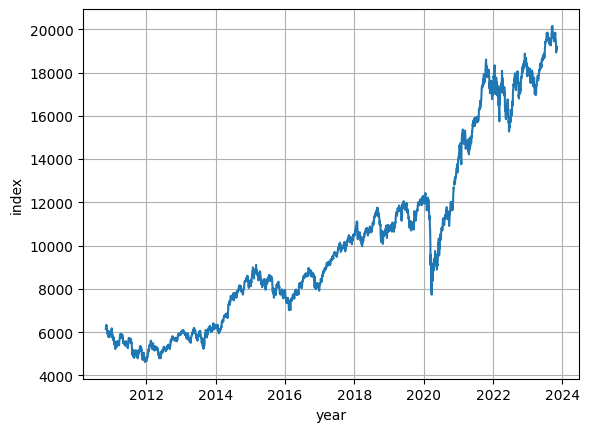

In [6]:

xaxis=modifiednifty["Date"]
yaxis=modifiednifty["Open"]
plt.plot(xaxis,yaxis)
plt.xlabel("year")
plt.ylabel("index")
plt.grid()
plt.show()

In [7]:
from sklearn import model_selection
Data=nifty[["Open","prev_day_close","prev_day_low","prev_day_high"]]
Output_low=nifty["Low"]
output_high=nifty["High"]
Data


,Open,prev_day_close,prev_day_low,prev_day_high
0,6209.600098,6160.500000,6146.799805,6182.500000
1,6335.250000,6281.799805,6199.350098,6290.149902
2,6281.000000,6273.200195,6265.350098,6335.899902
3,6303.200195,6301.549805,6243.549805,6310.899902
4,6286.350098,6275.700195,6269.250000,6307.649902
...,...,...,...,...
3154,18928.750000,18857.250000,18837.849609,19041.699219
3155,19053.400391,19047.250000,18926.650391,19076.150391
3156,19232.949219,19140.900391,18940.000000,19158.500000
3157,19064.050781,19079.599609,19056.449219,19233.699219


In [8]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(Data,Output_low,random_state=2)
xtrain1,xtest1,ytrain1,ytest1=model_selection.train_test_split(Data,output_high,random_state=2)

model_low=RandomForestRegressor()
model_high=RandomForestRegressor()





In [9]:
model_low.fit(xtrain,ytrain)
model_high.fit(xtrain1,ytrain1)




RandomForestRegressor()

In [10]:
model_low.predict(xtest)
model_high.predict(xtest1)

array([17911.64324211,  7901.95500486,  6017.11300288, 10611.01905276,
       20127.12380889,  7866.17459456, 11667.0849318 , 10874.8158984 ,
       17877.67207033,  7253.00208486, 11013.34919936,  8616.16306645,
       11217.77134769,  5865.64048823,  7964.06045887, 11687.867422  ,
        6155.52804216,  8643.31464837, 10290.31141591,  5441.84353033,
       10921.91011719, 10384.12452143, 10964.43718733, 16738.53062509,
       11283.93502939, 15882.02242194,  6009.85100581,  8610.70606448,
       18279.40900388,  8012.60744131,  7656.14750975,  9380.469961  ,
       17348.5591796 ,  8633.4415917 ,  8824.67973652,  7687.50548831,
        8155.27257312,  8249.72030297,  5235.78995603,  8734.77290036,
       16385.27233387, 10317.69893544,  5573.26095198,  7574.1130275 ,
        6082.8904885 ,  7179.68094247, 11912.75457035,  5331.49255353,
        7819.78292972, 19612.53658206,  4995.96904774, 19661.28949223,
       11621.40307626,  6742.98996094, 11471.37597637, 18155.40630853,
      

In [11]:
print(model_low.score(xtest,ytest))
print(model_high.score(xtest1,ytest1))

0.9997338858952824
0.9998043018691618
